In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns


loan_file = pd.read_csv(".\\loan\\loan.csv")

C:\Users\sachi\AppData\Local\Temp\ipykernel_19828\3265619948.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_file = pd.read_csv(".\\loan\\loan.csv")


## 1. Problem Statement ##

Problem to be solved: Identify patterns based on the columns which would be used to reject/deny loans, reduce the loan amount or charge higher interest rate.

## 2. Data Provided ##

The data shared is from a Consumer Finance company specializing in lending various types of loans. The data consist of 39717 rows spread across 111 columns. One of the columns indicates whether the loan is currently 

1. Ongoing
2. Fully Paid - Loan Fully paid by the Consumer
3. Charged Off - Consumer who has defaulted the loans and are marked for Collections by the Company.

In [2]:

loan_file.head(5)
loan_file.shape

(39717, 111)

# 3. Data Cleanup. #

#### 3.1 Identifying Null Columns ###

Based on cursory glance of the data, there are several columns which seem to have null values in the data. The first step is to identify colums which have null values.

In [3]:
type(loan_file.isnull().sum())

filtered_series = loan_file.isnull().sum()[loan_file.isnull().sum() == 39717]
print(filtered_series.shape)
filtered_series.to_csv('cols_having_empty_header.csv',header=['Count of Row Values'],index=True)


(54,)


#### 3.2 Removing Null-valued columns ####

There are over 54 columns which seem to have null values. The first step is to remove these columns as they do not contribute to analysis.
Throughout the course of analysis,  a CSV file is generated to view the output and to assess the progress. 

In [4]:
loan_file.dropna(axis=1,how='all',inplace=True)
loan_file.shape
total_length = len(loan_file)

# loan_file.columns[]
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.75]).value_counts())
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.50]).value_counts())
print((loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.25]).value_counts())

loan_file.drop(columns=loan_file.columns[(loan_file.isnull().sum()/total_length) > 0.50],inplace=True)
print(loan_file.shape)
loan_file.to_csv(".\\iteration_1.csv")

mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
mths_since_last_delinq    1
mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
desc                      1
mths_since_last_delinq    1
mths_since_last_record    1
next_pymnt_d              1
Name: count, dtype: int64
(39717, 54)


#### 3.3 Unique valued Columns ####

There are several columns which have unique values - these do not contribute to any analaysis due to invariant nature of data. The next step is to identify the list of columns and delete them.

In [5]:
unique_count_of_values = loan_file.nunique()
list_of_unique_count_of_values = unique_count_of_values[unique_count_of_values == 1].index.tolist()

print(list_of_unique_count_of_values)

# loan_file.drop(columns=['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],inplace=True)


loan_file.drop(columns=list_of_unique_count_of_values,inplace=True)
print(loan_file.shape)

loan_file.to_csv(".\\iteration_2.csv")

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
(39717, 45)


#### 3.4 Removal of additional columns. ####

Upon visual analysis of columns, there are several columns which does not aid the analysis. Deleting rows which are descriptive and which does not contribute to identification.

| Field Name | Remarks |
| -------- | -------- |
| member_id | We shall retain id for reference purpose. Assumption - member_id will be retrieved from id |
| emp_title | Descriptive. Does not seem to contribute. |
| emp_length | Descriptive. Does not seem to contribute. |
| title | Descriptive. Does not seem to contribute. |
| last_credit_pull_d | The most recent month LC pulled credit for this loan - Does not contribute towards analysis.. |
| last_pymnt_amnt |  Last total payment amount received - Does not contribute towards analysis.|
| last_pymnt_d | Last month payment was received - Does not contribute towards analysis. |
| collection_recovery_fee | post charge off collection fee - Does not contribute towards analysis. |
| earliest_cr_line | The month the borrower's earliest reported credit line was opened - Does not contribute towards analysis.|
| addr_state | The state provided by the borrower in the loan application - All the states are allowed . |
| Zip Code| The first 3 numbers of the zip code provided by the borrower in the loan application.  Removed to prevent redlining and bias from the model. |
| issue_d |  The month which the loan was funded- Does not contribute towards analysis.|
| funded_amnt |  The total amount committed to that loan at that point in time.|
| funded_amnt_inv |  The total amount committed by investors for that loan at that point in time..|
| verification_status |  Indicates if income was verified by LC, not verified, or if the income source was verified.|
|url| URL for the LC page with listing data - Does not contribute to analysis|
|desc| Loan description provided by the borrower - Does not contribute to analysis|
|total_rec_late_fee|Late fees received to date - Does not contribute to analysis|
|total_rec_prncp|Principal received to date - Does not contribute to analysis|
|total_rec_int|Interest received to date - Does not contribute to analysis|
|out_prncp|Remaining outstanding principal for total amount funded - Does not contribute to analysis|
|out_prncp_inv|Remaining outstanding principal for portion of total amount funded by investors - Does not contribute to analysis|
|total_pymnt|Payments received to date for total amount funded - Does not contribute to analysis|
|total_pymnt_inv|Payments received to date for portion of total amount funded by investors - Does not contribute to analysis|







In [6]:
loan_file.drop(columns=['member_id','emp_title','emp_length','title','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','earliest_cr_line','addr_state','zip_code','issue_d','funded_amnt','funded_amnt_inv','verification_status','total_rec_late_fee','total_rec_prncp','total_rec_int','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','url','desc'],inplace=True)
print(loan_file.shape)
loan_file.to_csv(".\\iteration_3.csv")
# print(loan_file.tail(0))

(39717, 21)


#### 3.5 Remove In-Progress Loans from Analysis ####
Identify and remove entries which are ongoing. These will not contribute to the analysis.

At the end of this exercise, the data will contain only loans which are 'Charged Off' or 'Fully Paid'.

In [7]:
loan_file = loan_file[loan_file['loan_status'] != 'Current']
loan_file.head(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,162.87,B,B2,RENT,24000.0,Fully Paid,...,27.65,0,1,3,0,13648,83.70%,9,0.00,0.0
1,1077430,2500,60 months,15.27%,59.83,C,C4,RENT,30000.0,Charged Off,...,1.00,0,5,3,0,1687,9.40%,4,117.08,0.0
2,1077175,2400,36 months,15.96%,84.33,C,C5,RENT,12252.0,Fully Paid,...,8.72,0,2,2,0,2956,98.50%,10,0.00,0.0
3,1076863,10000,36 months,13.49%,339.31,C,C1,RENT,49200.0,Fully Paid,...,20.00,0,1,10,0,5598,21%,37,0.00,0.0
5,1075269,5000,36 months,7.90%,156.46,A,A4,RENT,36000.0,Fully Paid,...,11.20,0,3,9,0,7963,28.30%,12,0.00,0.0


#### 3.6 Identify columns with empty vlaues and fill them. ####

From the remaining data, identify columns which have empty cells. The next step is to identify the appropriate data to be fill the values. For this, we shall use the mode to identify and populate the values.

In [8]:
print(loan_file.isna().sum() > 0)
print(loan_file['revol_util'].mode())
print(loan_file['pub_rec_bankruptcies'].mode())

loan_file['revol_util'].fillna(loan_file['revol_util'].mode()[0],inplace=True)
loan_file['pub_rec_bankruptcies'].fillna(loan_file['pub_rec_bankruptcies'].mode()[0])

id                      False
loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
home_ownership          False
annual_inc              False
loan_status             False
purpose                 False
dti                     False
delinq_2yrs             False
inq_last_6mths          False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
recoveries              False
pub_rec_bankruptcies     True
dtype: bool
0    0%
Name: revol_util, dtype: object
0    0.0
Name: pub_rec_bankruptcies, dtype: float64


0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [9]:
loan_file['term'].value_counts()

loan_amnt_quantile = loan_file['loan_amnt'].quantile([0.5,0.75,0.8,.85,.9,.95,.99])

print(loan_amnt_quantile)

0.50     9600.0
0.75    15000.0
0.80    16000.0
0.85    20000.0
0.90    21600.0
0.95    25000.0
0.99    35000.0
Name: loan_amnt, dtype: float64


# 4. Visual Representation of Data #

We have now narrowed down to 21 columns from 111 columns. The next step to commence plotting data for exploratory analysis.

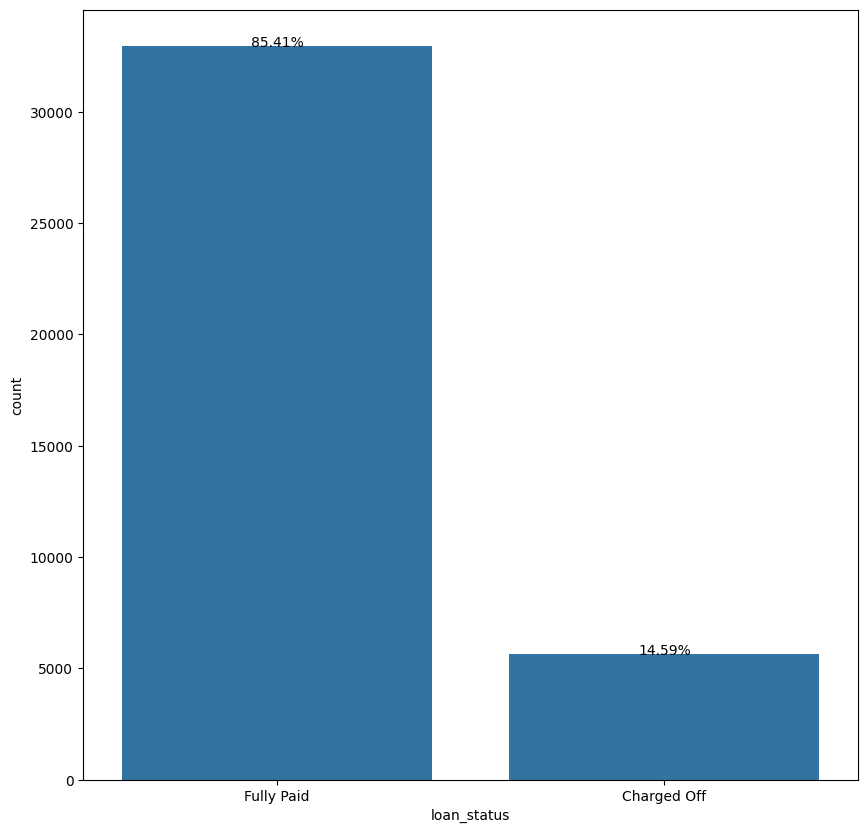

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='loan_status',data=loan_file)

total = float(len(loan_file))  # Total number of entries
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1.0,
        '{:.2f}%'.format((height / total) * 100),
        ha="center"
    )

plt.show()

From the above plot, there are about 14.59% of Consumers(excluding 'In-Progress' consumers) have defaulted(i.e. 'Charged Off'). The focus would now be to identify the distribution of data for 'Charged off' consumers to identify the pattern.

#### 4.1 : Segregating data based on analysis ####

The first step is to segregate the 'Charged off' consumers to identify patterns.

In [11]:
charged_off_file = loan_file[loan_file['loan_status']=='Charged Off']


charged_off_file['term'].apply(lambda x:x.replace('36 months','36'))
charged_off_file['term'].apply(lambda x:x.replace('60 months','60'))

# print(charged_off_file.head(2))

loan_file.to_csv(".\\iteration_4.csv")


#### 4.2 Plot of 'Charged off' consumers vs Grade/Sub-Grade

We now plot the graph of Count of 'Charged Off' consumers by Grade. 

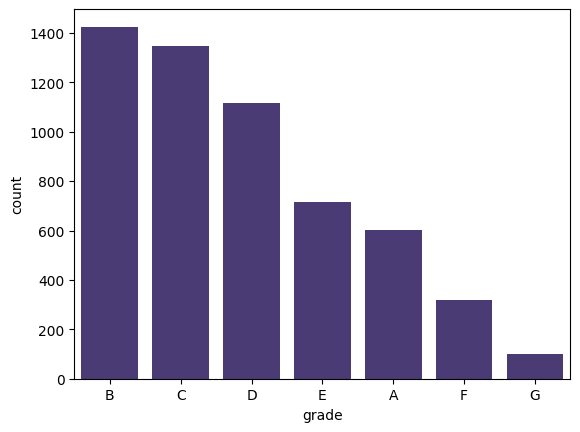

In [12]:
# sns.boxplot(x='sub_grade',data=charged_off_file)
sns.set_palette("viridis")
sns.countplot(x='grade',data=charged_off_file,order=charged_off_file['grade'].value_counts().index)
plt.show()

Four of the grades show substantial charge-off's by customers. We shall now analyze the sub-grades of these 4 grades to identify patterns.

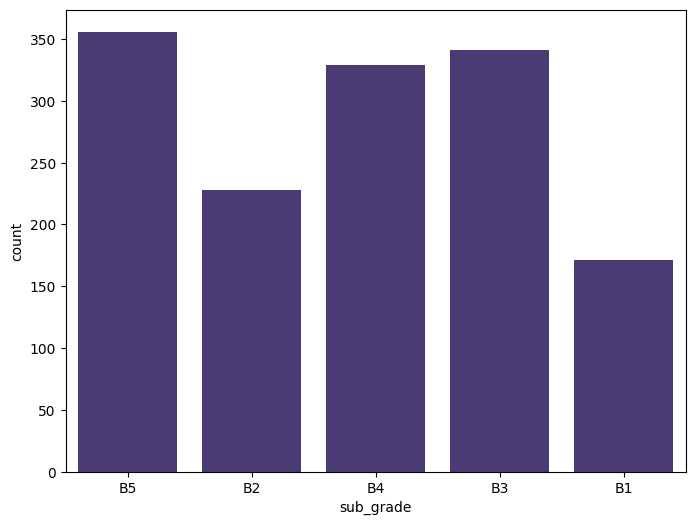

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_palette('colorblind')
# sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data =charged_off_file)
# sns.countplot(x = 'grade', order = ['B', 'C', 'D', 'E'] , hue = 'sub_grade',data =charged_off_file[charged_off_file['grade'].isin(['B','C','D','E'])])
sns.countplot(x='sub_grade',data=charged_off_file[charged_off_file['grade'].isin(['B'])])
plt.show()

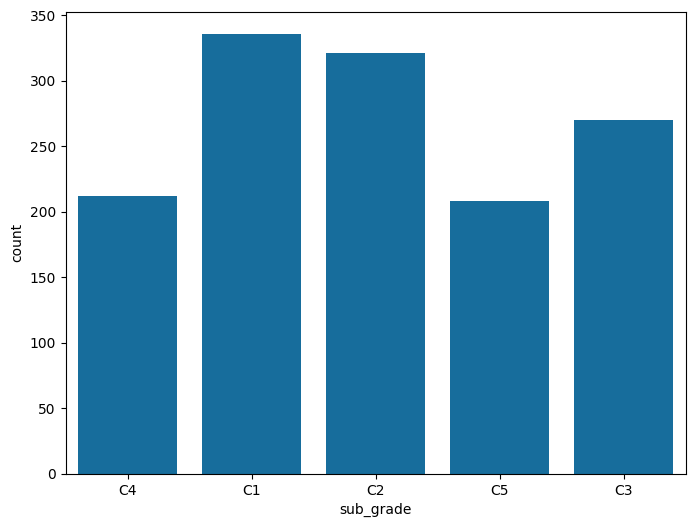

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_palette('colorblind')
sns.countplot(x='sub_grade',data=charged_off_file[charged_off_file['grade'].isin(['C'])])
plt.show()

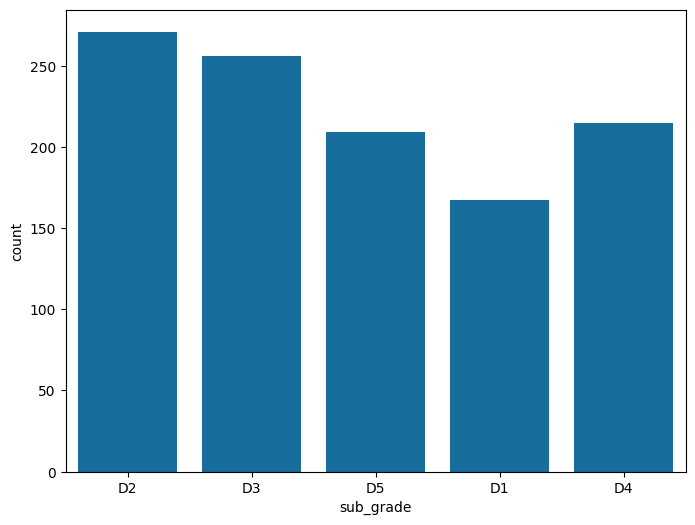

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_palette('colorblind')
sns.countplot(x='sub_grade',data=charged_off_file[charged_off_file['grade'].isin(['D'])])
plt.show()

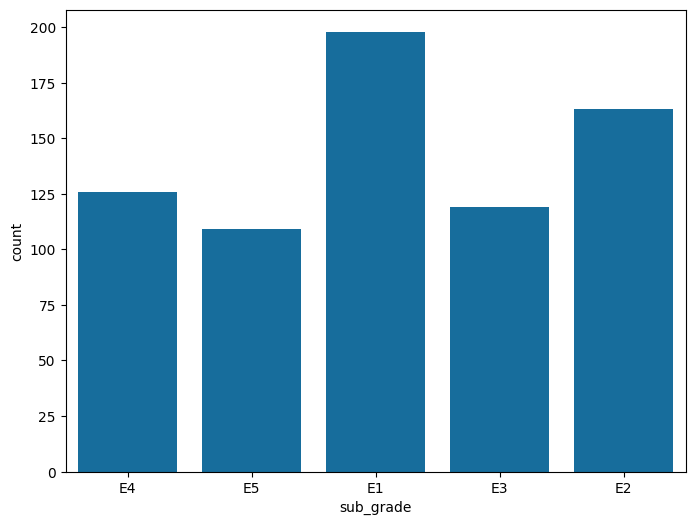

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_palette('colorblind')
sns.countplot(x='sub_grade',data=charged_off_file[charged_off_file['grade'].isin(['E'])])
plt.show()


#### 4.3 Plot of Charge-off Consumers based on Home-ownership. ####

We now plot a graph based on home-ownership.

<Axes: xlabel='home_ownership', ylabel='count'>

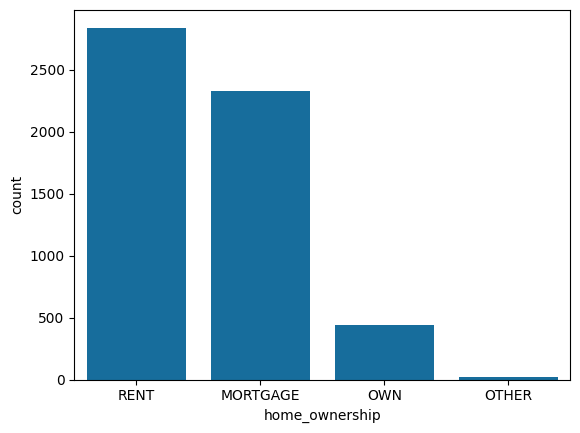

In [17]:
sns.countplot(x = 'home_ownership',data =charged_off_file, order=charged_off_file['home_ownership'].value_counts().index)

From the table above, consumers whose have rented their homes and are paying mortgage are more likely to defaut than other category.

#### 4.4 Plot of Charge-off Consumers based on Loan purpose. ####

Below is the plot of data based on Loan purpose.

<Axes: xlabel='purpose', ylabel='count'>

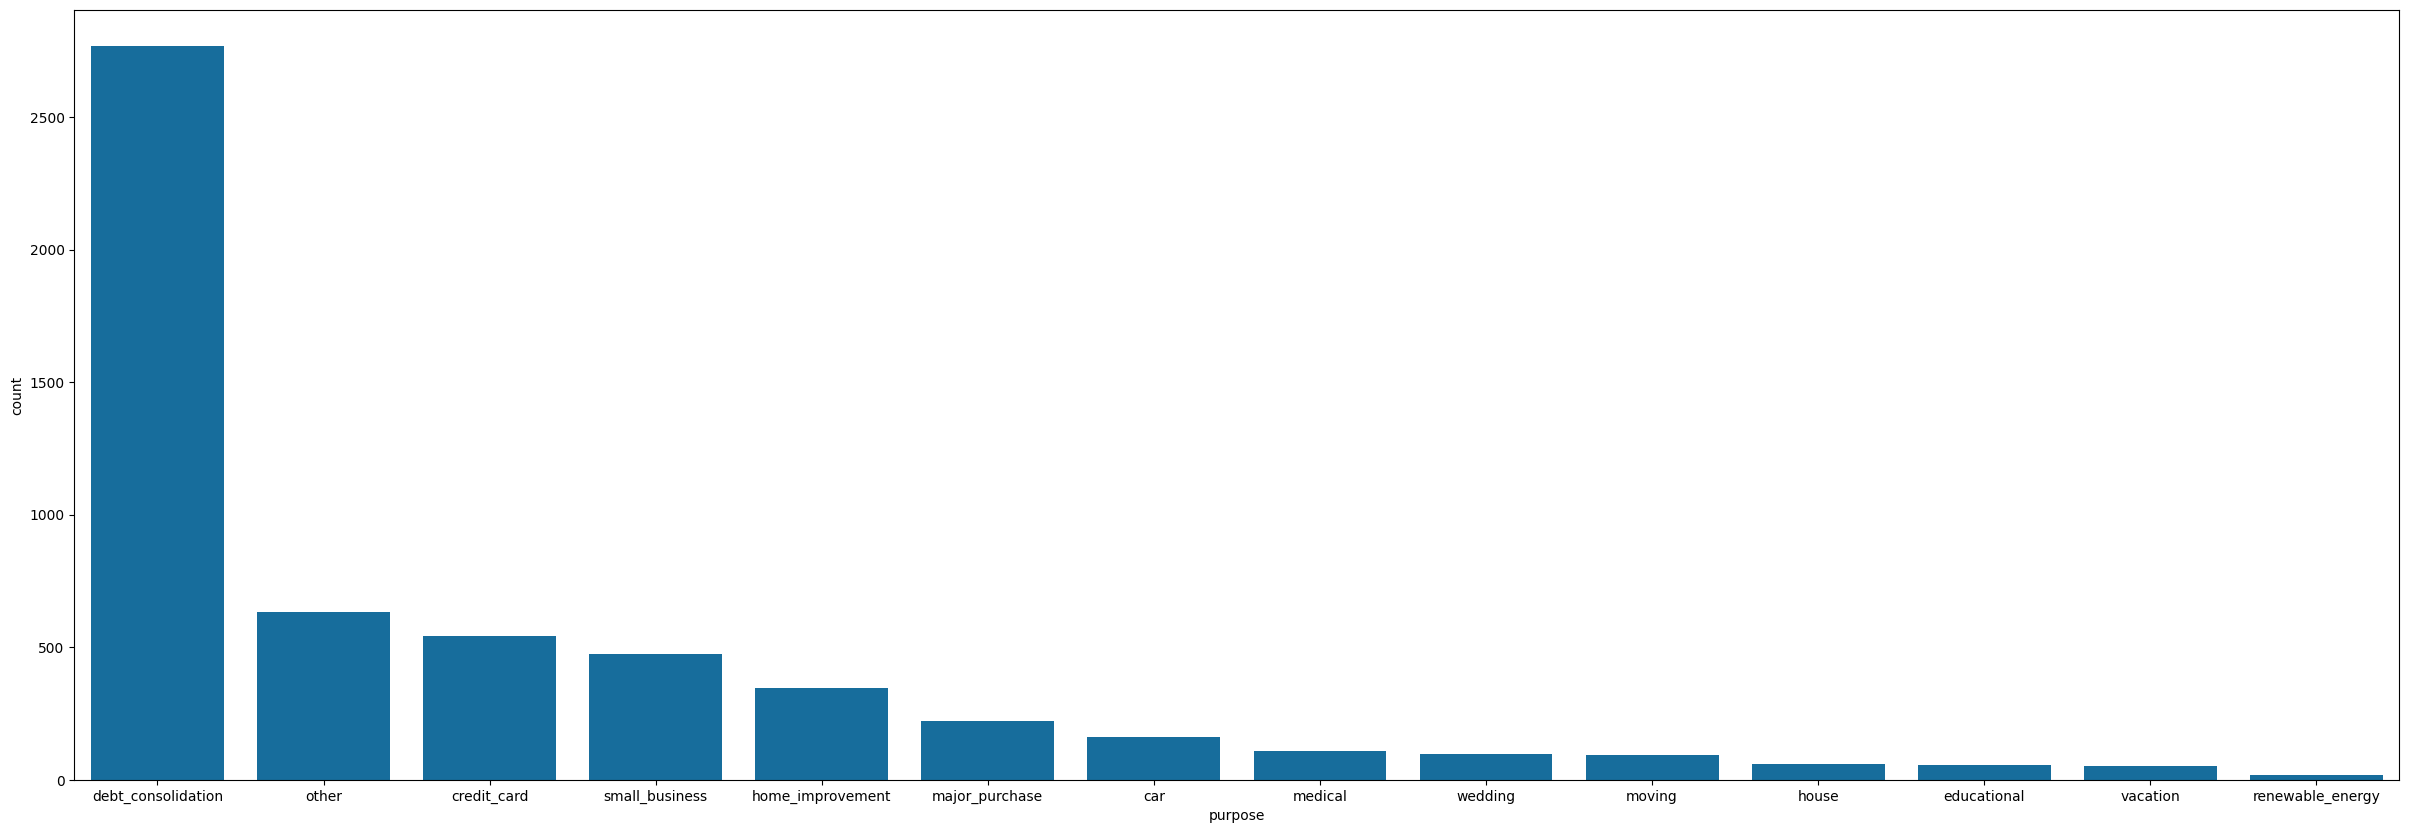

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
sns.countplot(x = 'purpose',data =charged_off_file, order=charged_off_file['purpose'].value_counts().index)

From the above data, people, who are planning to consolidate debt are more likely to default than other category.

#### 4.4 Plot of consumers who are deliquent for 2 years or more and who have had multiple inquiries in the last 6 months. ***

The below plot shows the accounts which are deliquent for 2 years or more or consumers who have made multiple enquiries. The notion is that account which are deliquent & consumers who have made multiple enquiries are in need of additional credit due to strained financial circumstances. 

However, the below plot shows that greater defaults have happened due to non-deliquent consumers. Also, there does not seem to be any relationship between inquiries and 'charge-off's.

<Axes: xlabel='delinq_2yrs', ylabel='count'>

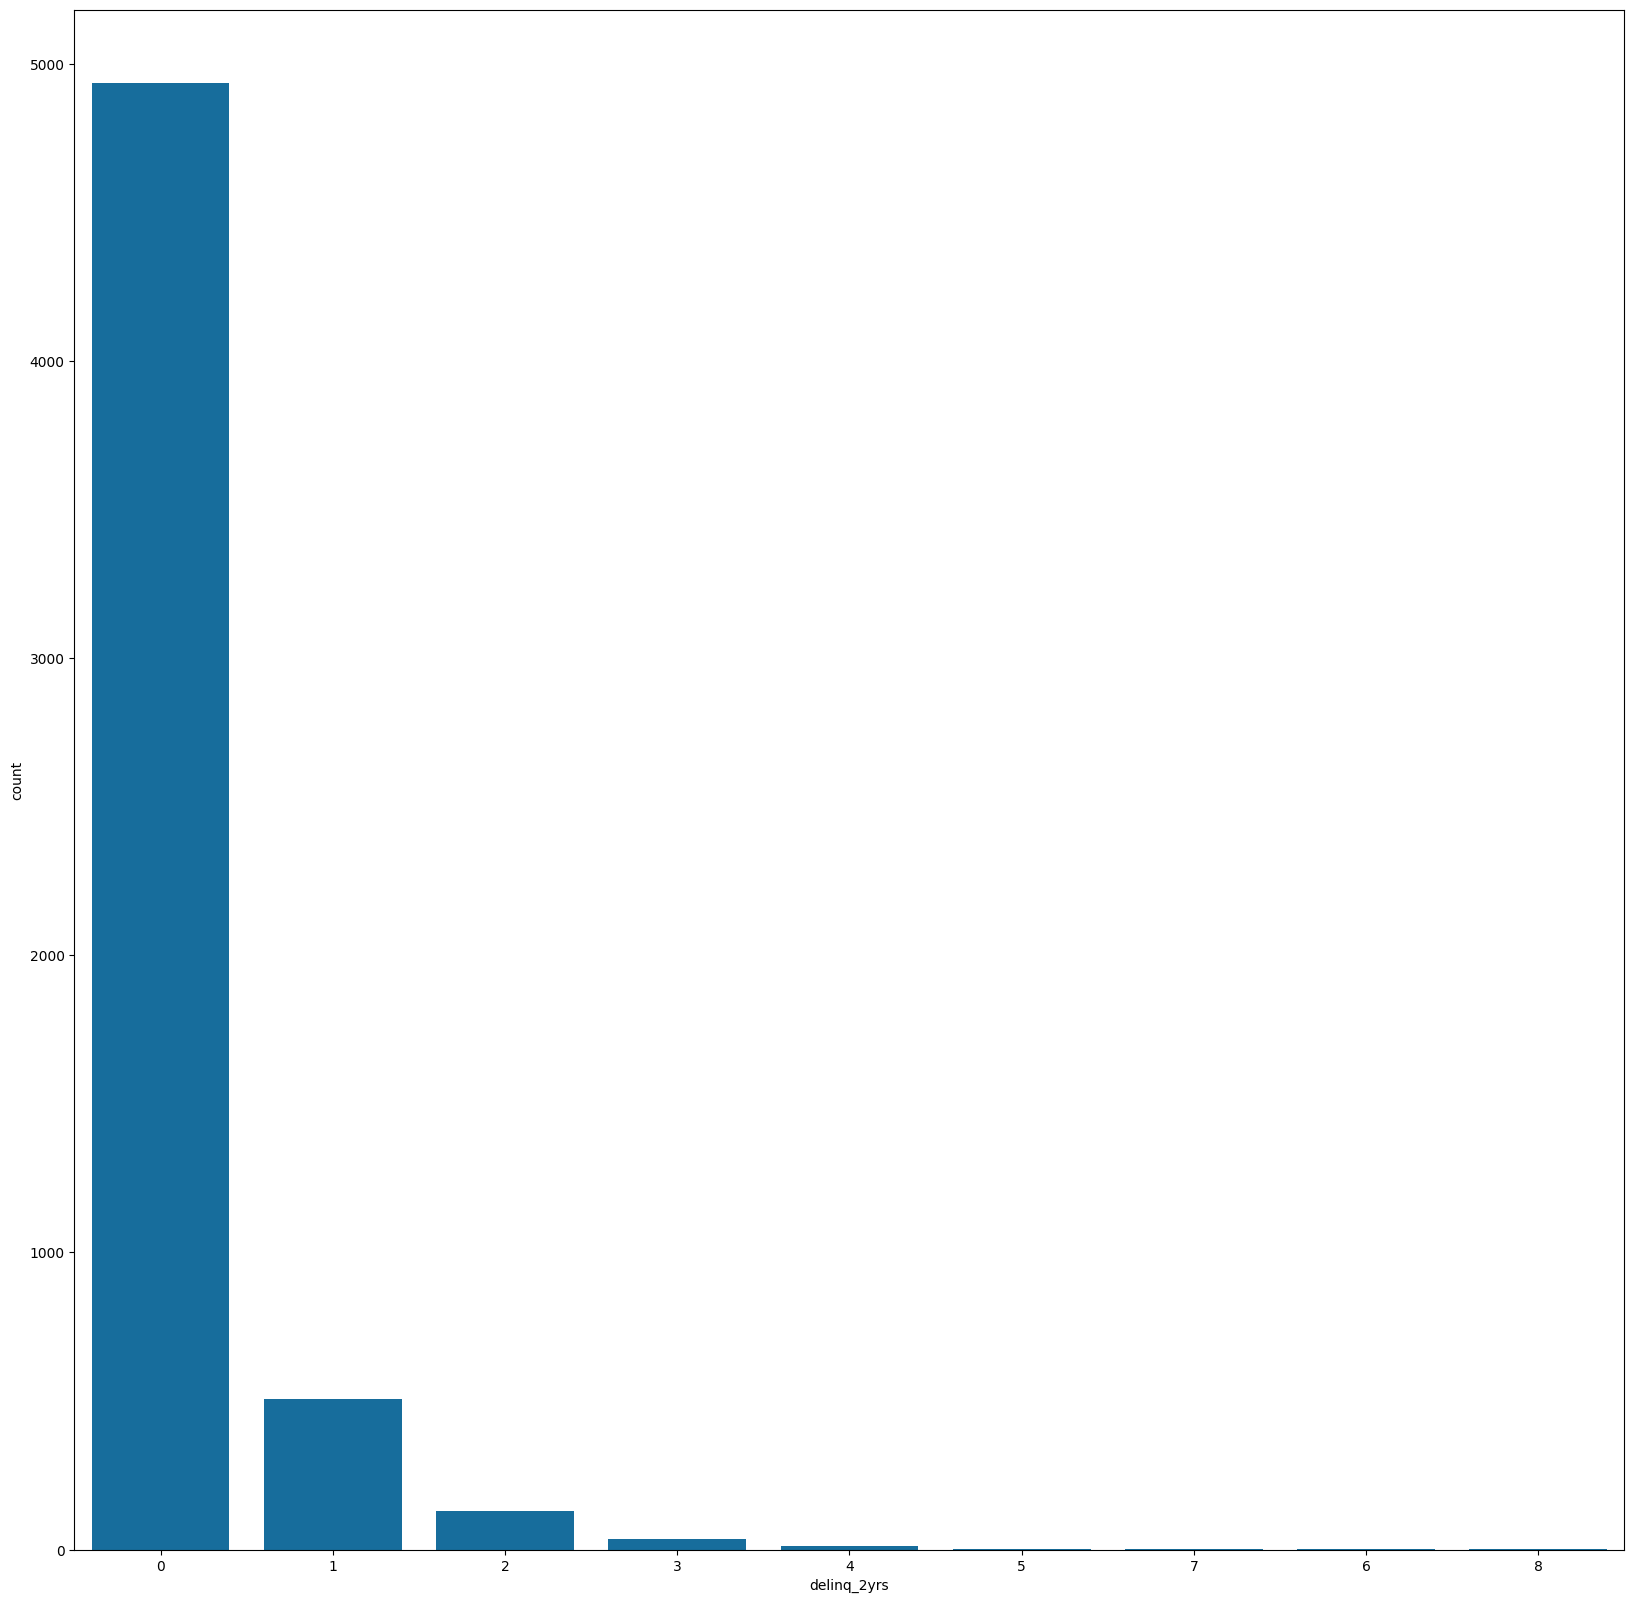

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set_palette('colorblind')
sns.countplot(x = 'delinq_2yrs',data =charged_off_file, order=charged_off_file['delinq_2yrs'].value_counts().index)

<Axes: xlabel='inq_last_6mths', ylabel='count'>

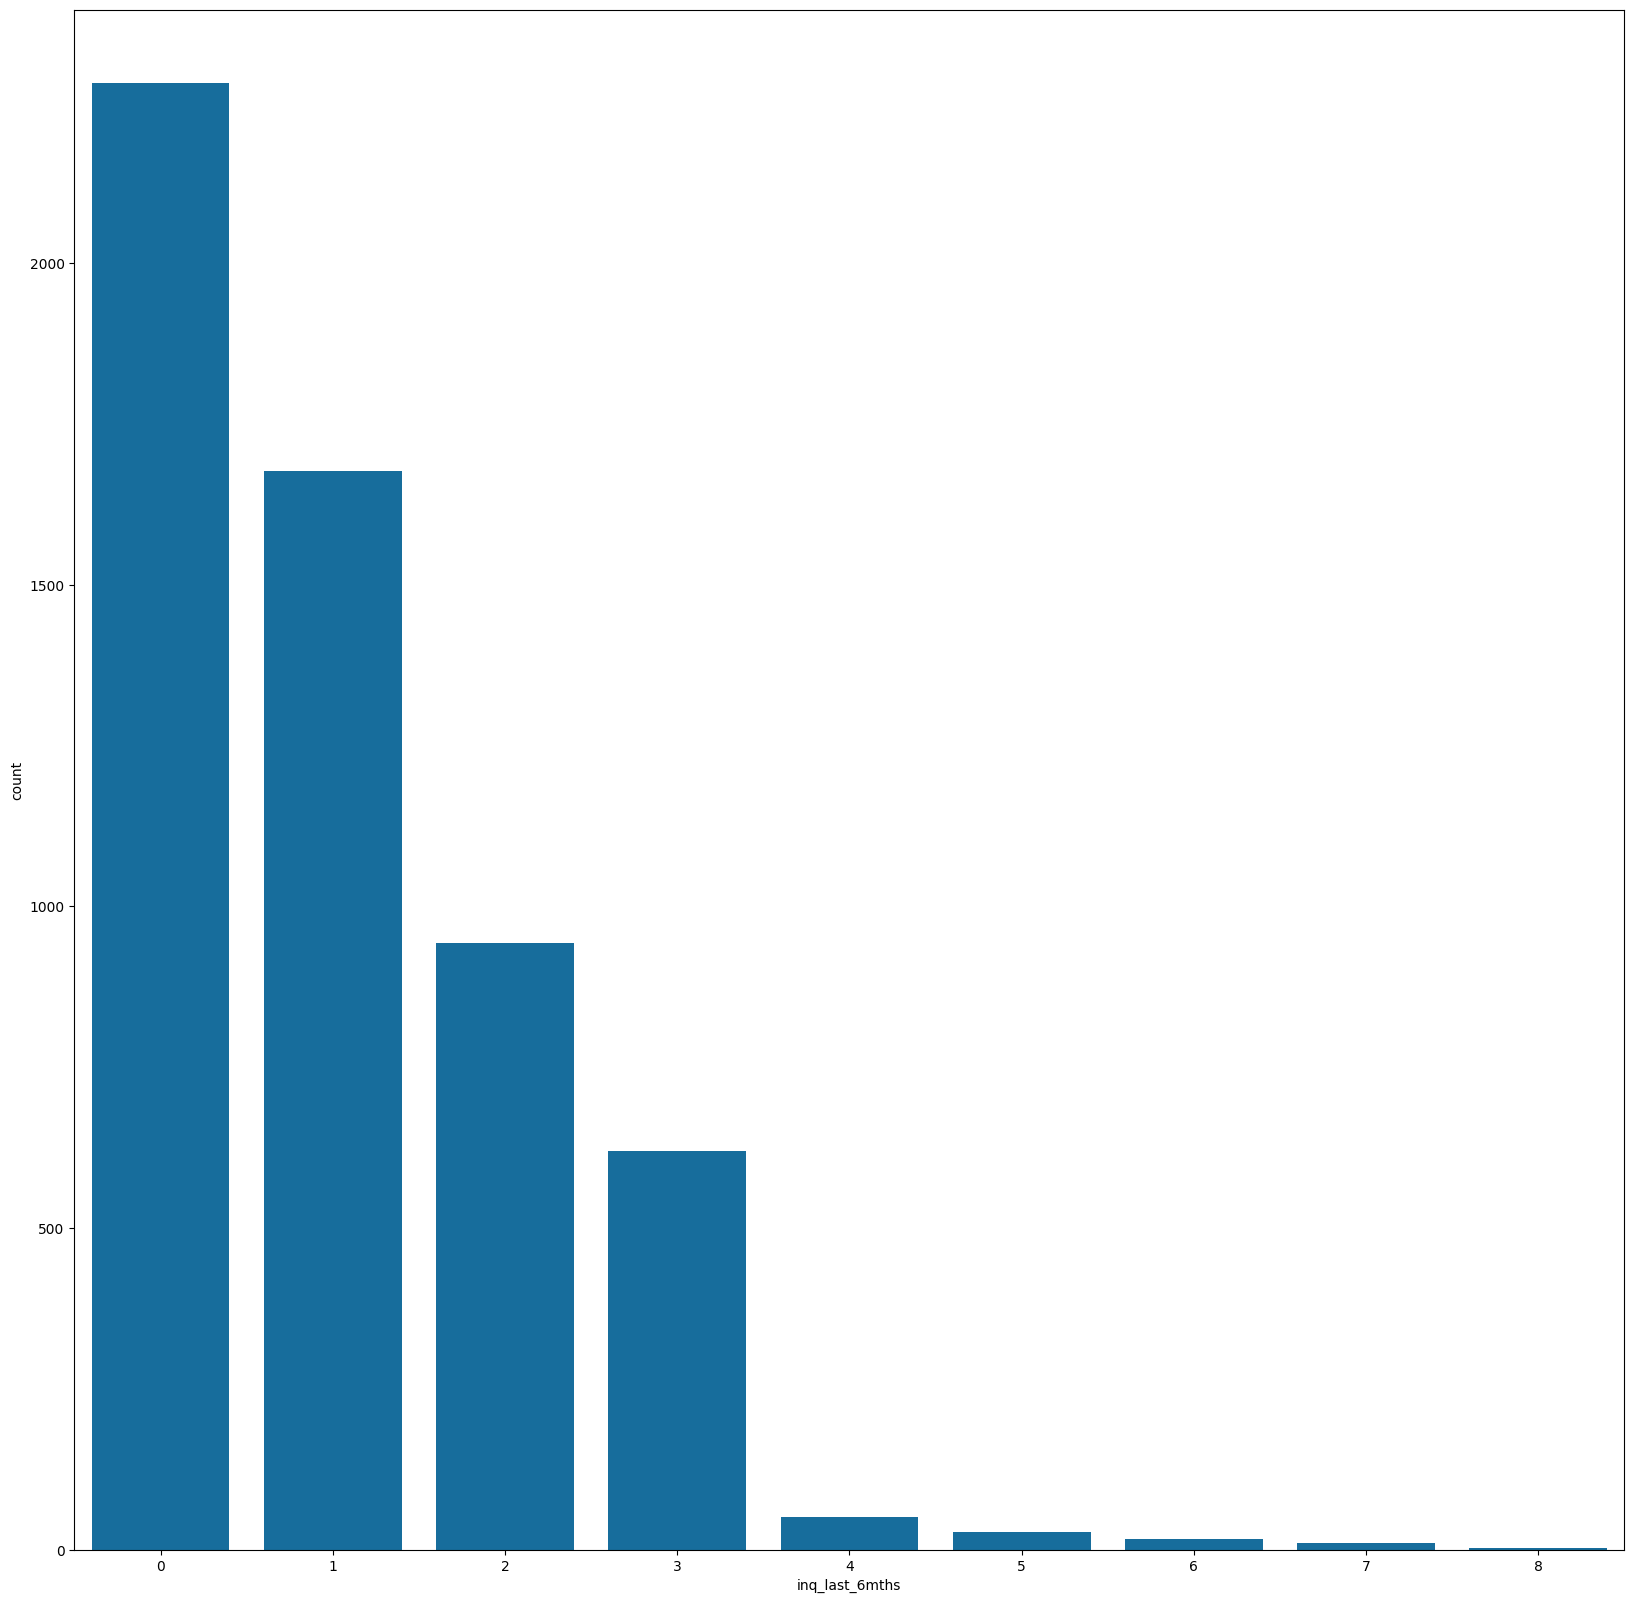

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set_palette('colorblind')
sns.countplot(x = 'inq_last_6mths',data =charged_off_file, order=charged_off_file['inq_last_6mths'].value_counts().index)

#### 4.5 Plot of Open/Total Accounts in Charge-off #####


The plot of total number of accounts/number of open Accounts follow similar to normal curve with the peak of the charge off lying between 6 - 8 accounts.

<Axes: xlabel='total_acc', ylabel='count'>

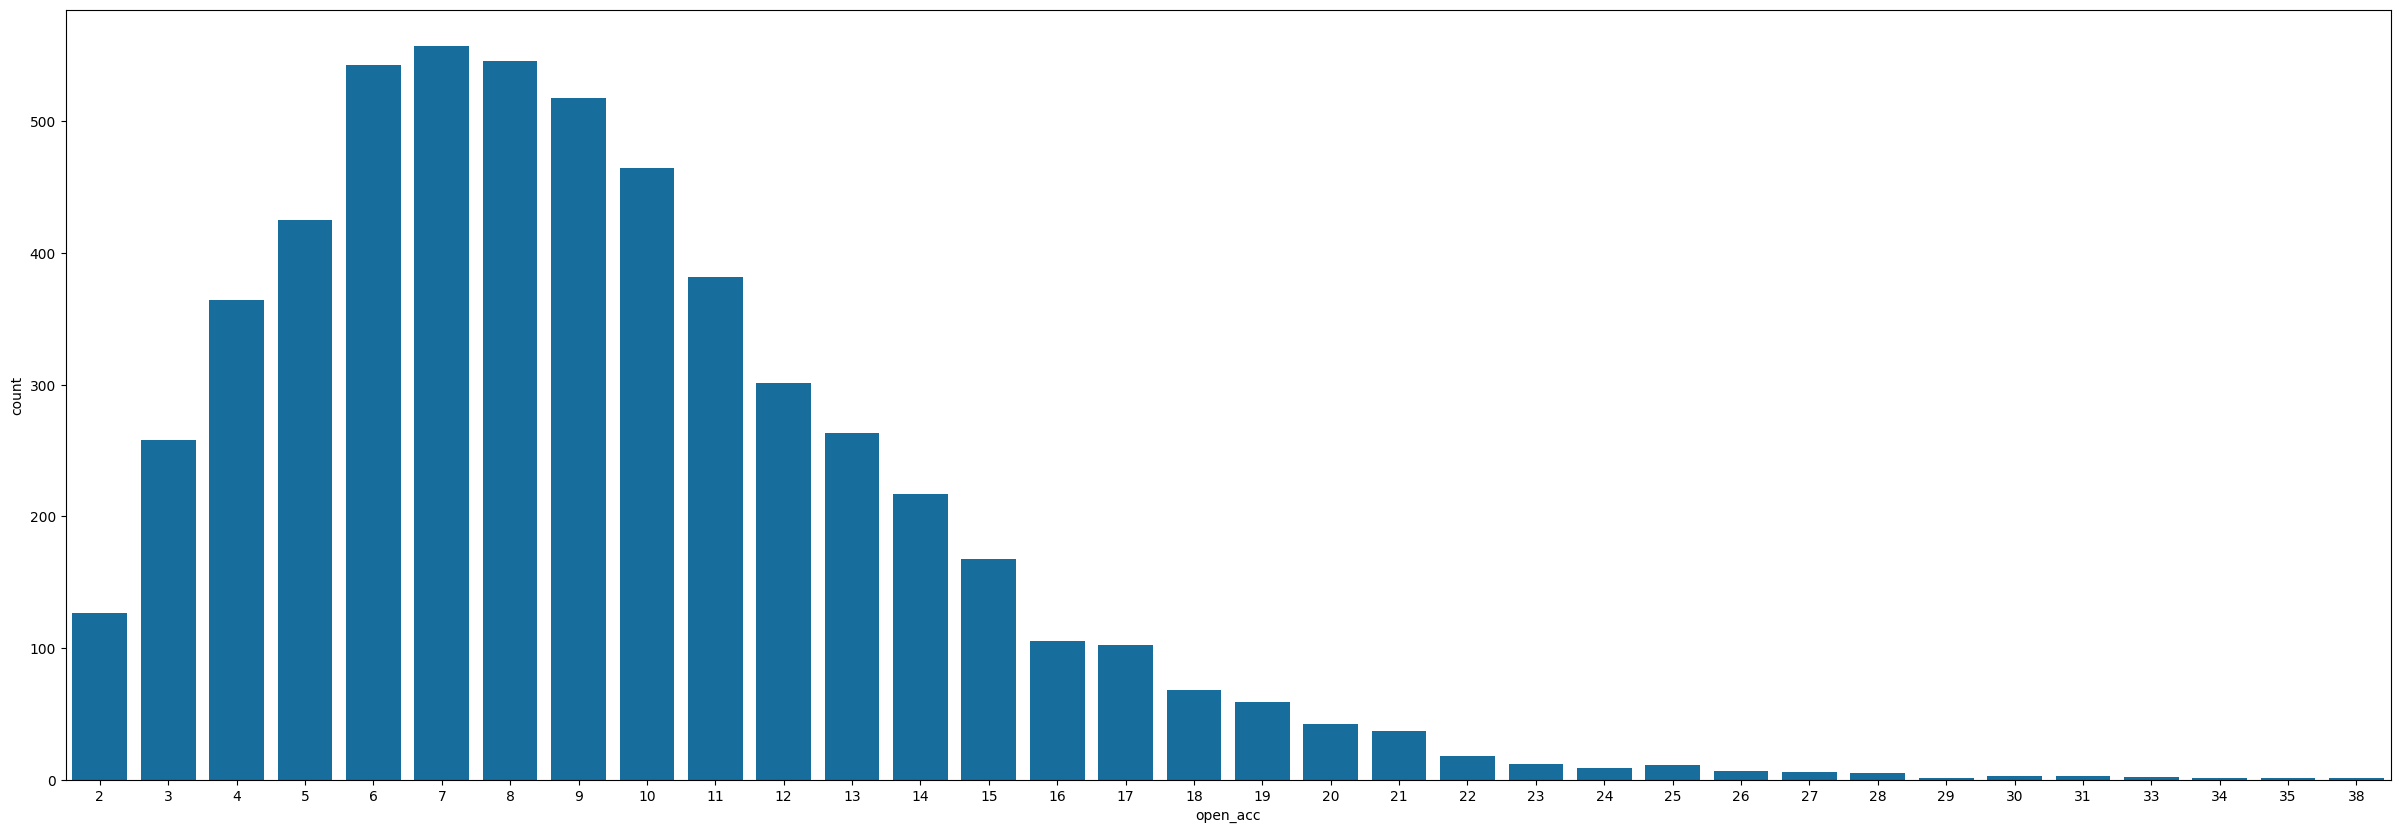

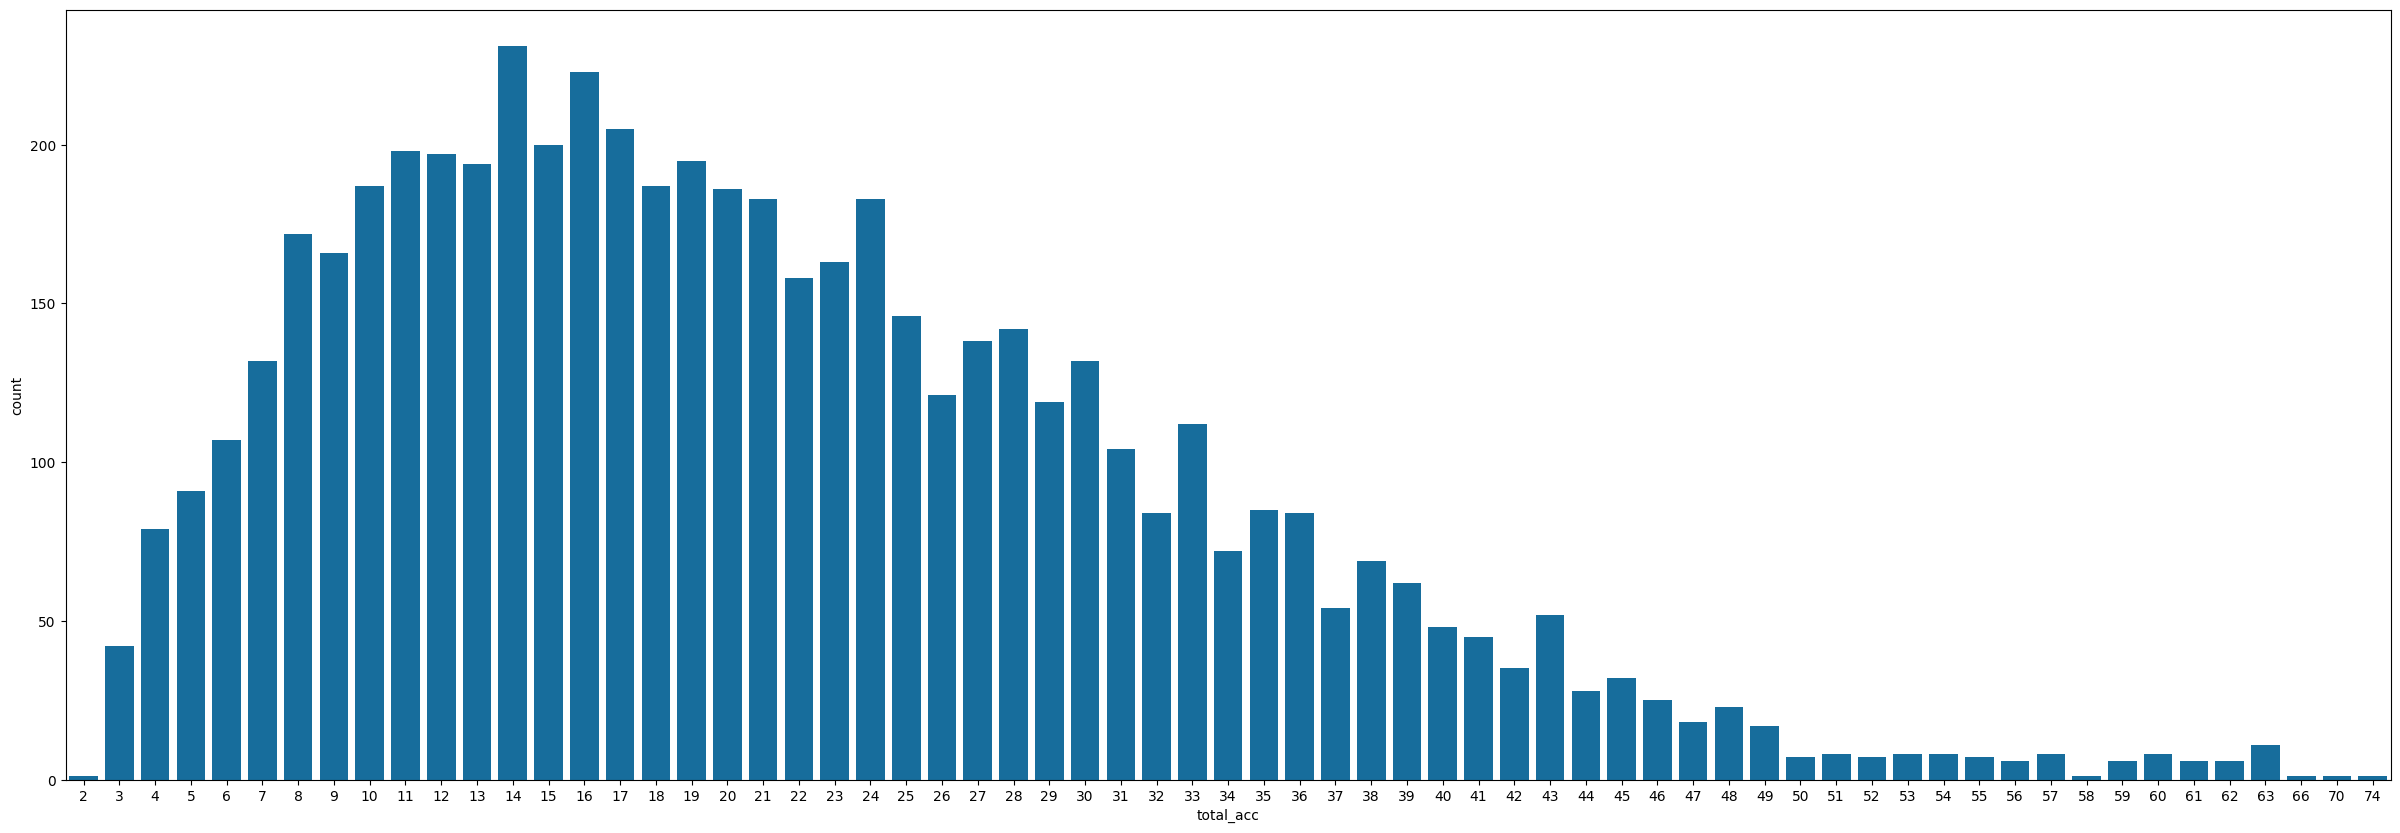

In [21]:
# print(charged_off_file.info())

fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'open_acc',data =charged_off_file)


# list_openacc = lambda x: print(x['open_acc'],x['open_acc'].value_counts())

# list_openacc(charged_off_file)


fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'total_acc',data =charged_off_file)

#list_openacc = lambda x: print(x['total_acc'],x['total_acc'].value_counts())

# list_openacc(charged_off_file)


#### 4.6 Plot of Term vs Charged-off #####


The plot of total number of accounts/number of open Accounts follow similar to normal curve with the peak of the charge off lying between 6 - 8 accounts.

<Axes: xlabel='term', ylabel='count'>

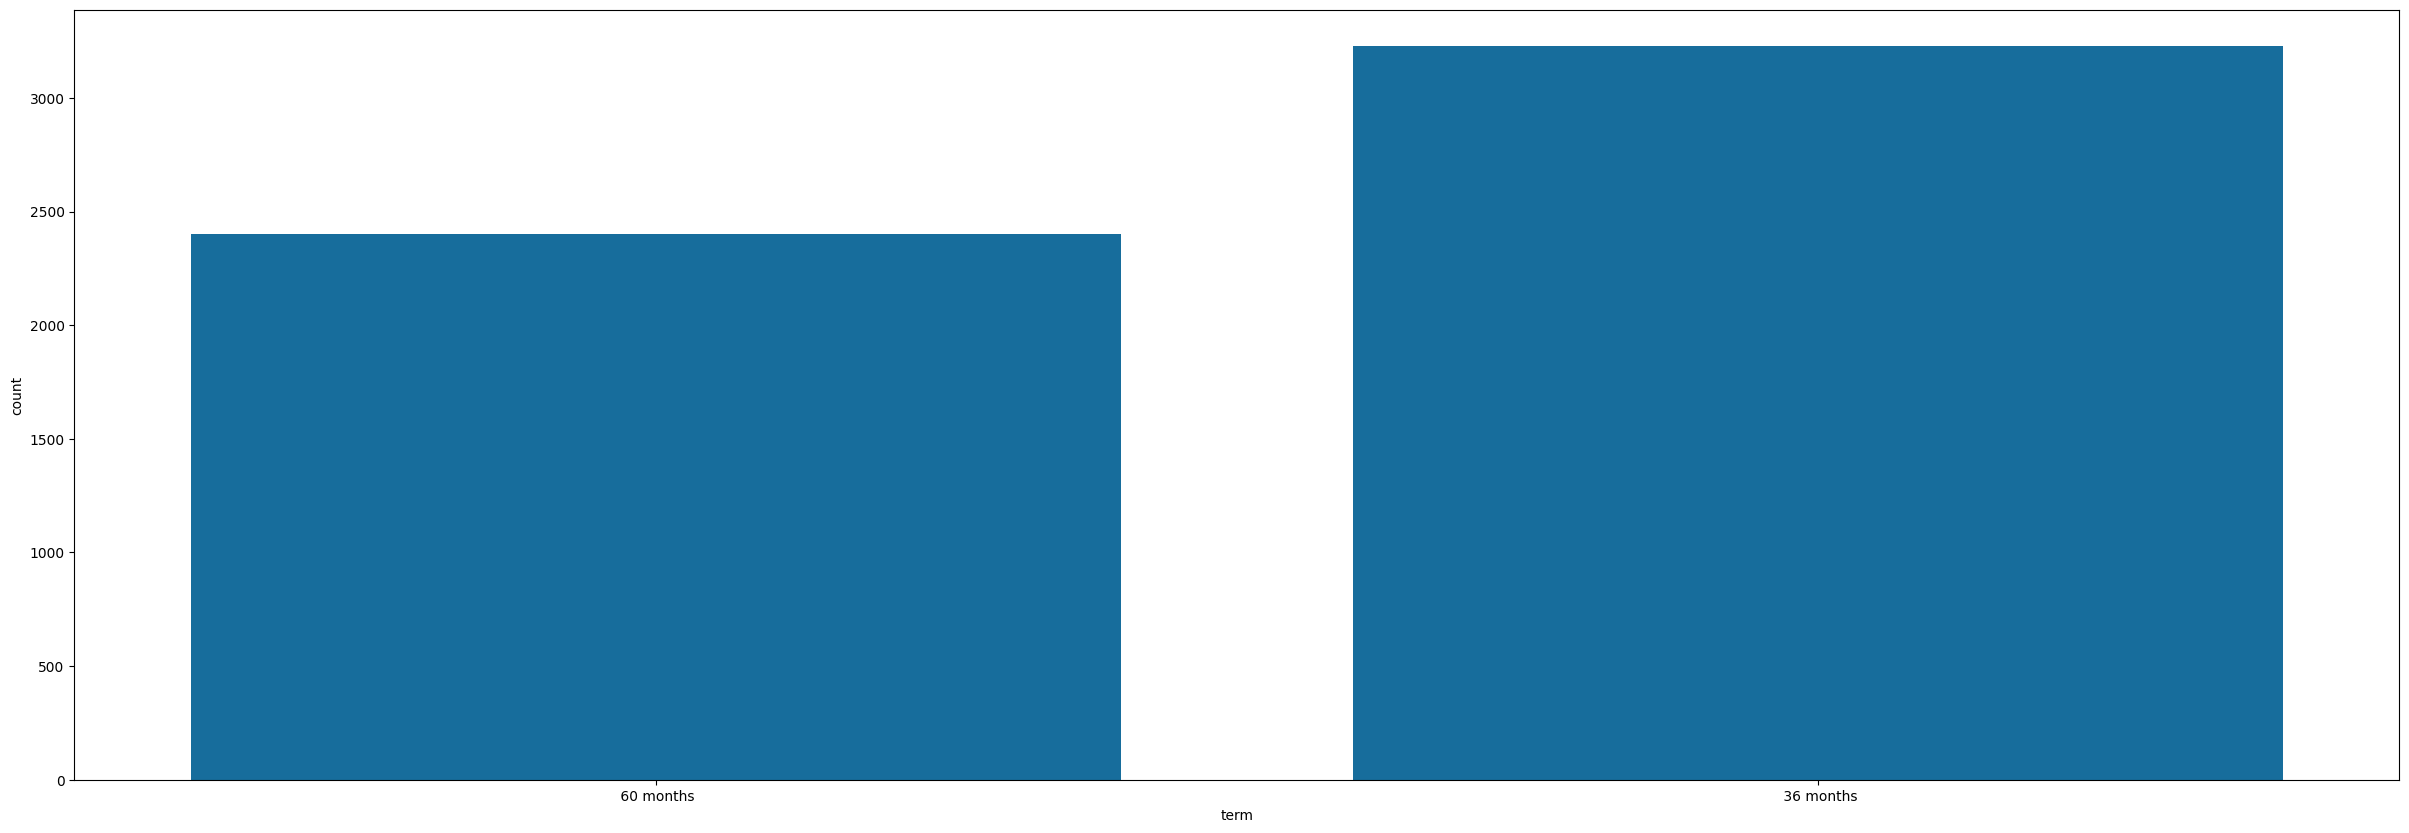

In [53]:
# print(charged_off_file.info())

fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'term',data =charged_off_file)

# 5. Binning of continuous attributes #

For the purpose of the analysis, the following attributes would need to be 'binned' as discrete distribution. For this, we are binning the following attributes - Loan Amount, Interest Rate, Annual Income, DTI.

Instead of using mean/median & standard deviation, we have identified the minimum/maximum values and identify the bins.

In [22]:
print("Loan Amount:",charged_off_file['loan_amnt'].mean(),charged_off_file['loan_amnt'].median(),charged_off_file['loan_amnt'].max(),charged_off_file['loan_amnt'].min())
print("Interest Rate:",charged_off_file['int_rate'].max(),charged_off_file['int_rate'].min())
print("Annual Income:",charged_off_file['annual_inc'].mean(),charged_off_file['annual_inc'].median(),charged_off_file['annual_inc'].max(),charged_off_file['annual_inc'].min())
print("DTI:",charged_off_file['dti'].mean(),charged_off_file['dti'].median(),charged_off_file['dti'].max(),charged_off_file['dti'].min())
# print("Total Number of Accounts:",charged_off_file['total_acc'].median(),charged_off_file['total_acc'].max(),charged_off_file['total_acc'].min())


Loan Amount: 12104.385107517328 10000.0 35000 900
Interest Rate: 9.99% 10.00%
Annual Income: 62427.298034476626 53000.0 1250000.0 4080.0
DTI: 14.000623778212193 14.29 29.85 0.0


In [46]:
charged_off_file['dti_bin'] = pd.cut(charged_off_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
charged_off_file['loan_amnt_bin'] = pd.cut(charged_off_file['loan_amnt'], bins=5,precision =0,labels=['0-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
charged_off_file['annual_inc_bin'] = pd.cut(charged_off_file['annual_inc'], bins=9,precision =0,labels=['0-3k','3k-8k','8k-15k','15k-25k','25k-50k','50k-75k','75k-125k','125k-250k','250k-1250k'])
charged_off_file['total_acc_bin'] = pd.cut(charged_off_file['total_acc'], bins=8,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
#charged_off_file['loan_amnt'] = pd.cut(charged_off_file['loan_amnt'], bins=10,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21
charged_off_file.to_csv(".\\iteration_5.csv")                                                                                                                                                                                        


C:\Users\sachi\AppData\Local\Temp\ipykernel_19828\1234764967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_file['dti_bin'] = pd.cut(charged_off_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_19828\1234764967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_file['loan_amnt_bin'] = pd.cut(charged_off_file['loan_amnt'], bins=5,precision =0,labels=['0-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
C

#### 5.1 Analysis of dti Data ####

Based on analysis of dti bin data, dti value of 5-25 are more likely to default with dti ratio of 15-20 having max defaults.

<Axes: xlabel='dti_bin', ylabel='count'>

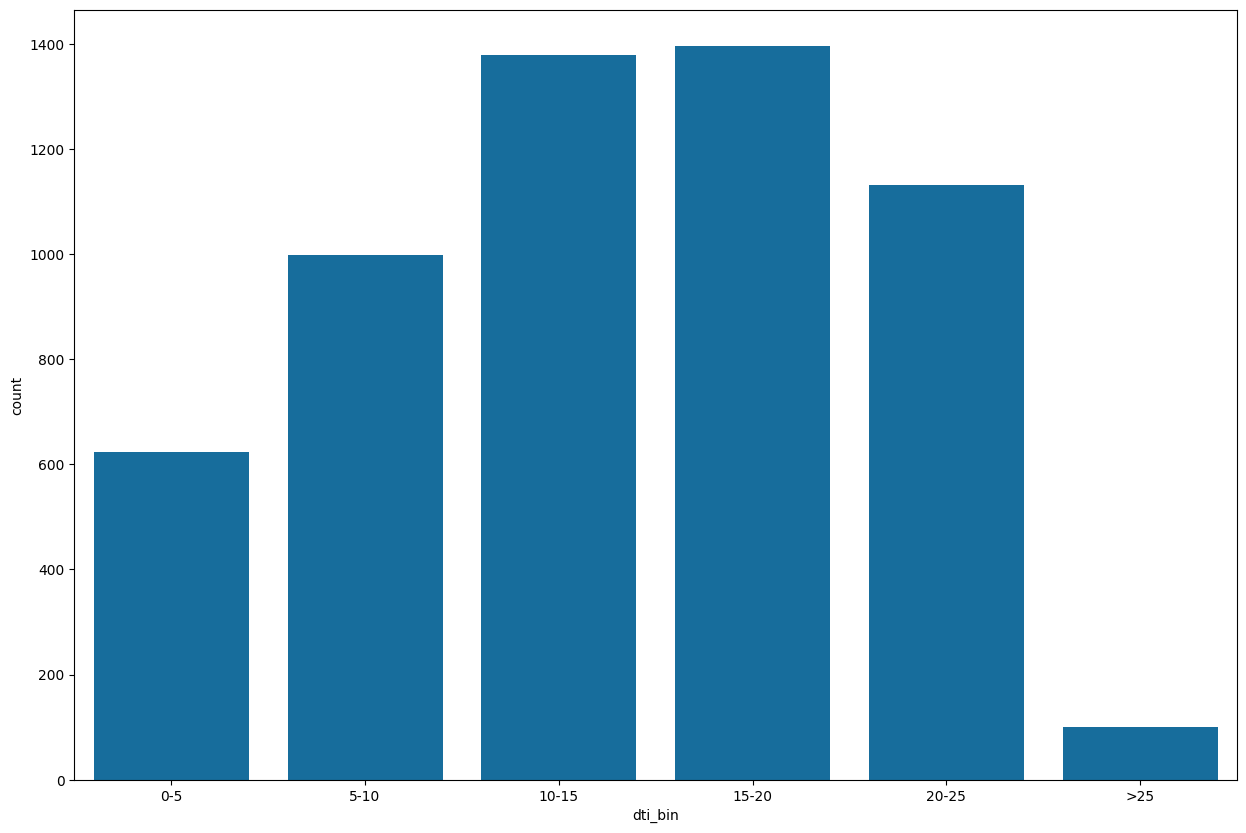

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'dti_bin',data =charged_off_file)




#### 5.2 Analysis of Loan Amount Data ####

Loan amount for charged off loans span between 900 - 35K. Analysis of loan data indicates many are smaller loan size, with more defaults happening between USD 0-7000 followed by 7K-14K and 14K-21K.

<Axes: xlabel='loan_amnt_bin', ylabel='count'>

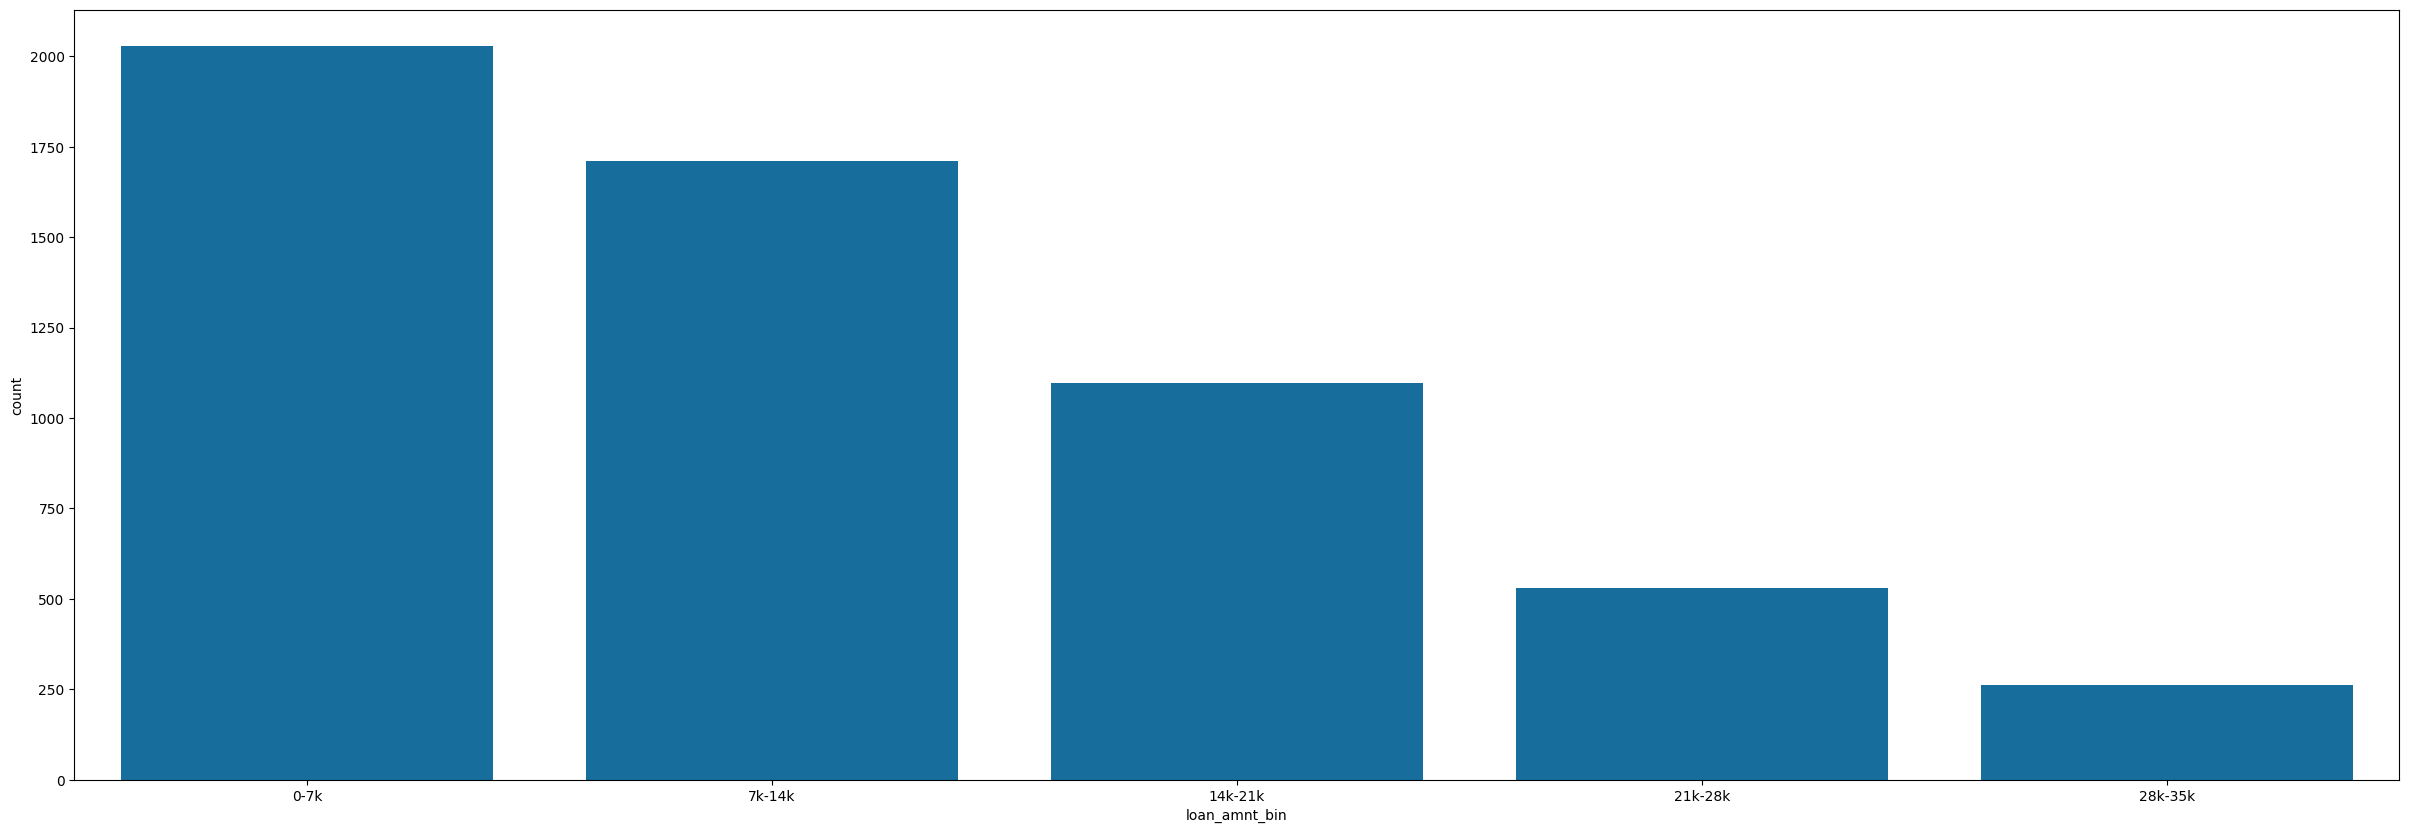

In [26]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')
# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'loan_amnt_bin',data =charged_off_file)


#### 5.3 Analysis of Annual Income Data ####

Eventhough the LC has consumers whose Annual income spans from 4K USD till 1.25 MUSD, a vast majority of the customers who had defaulted are in the lower income bracket.

<Axes: xlabel='annual_inc_bin', ylabel='count'>

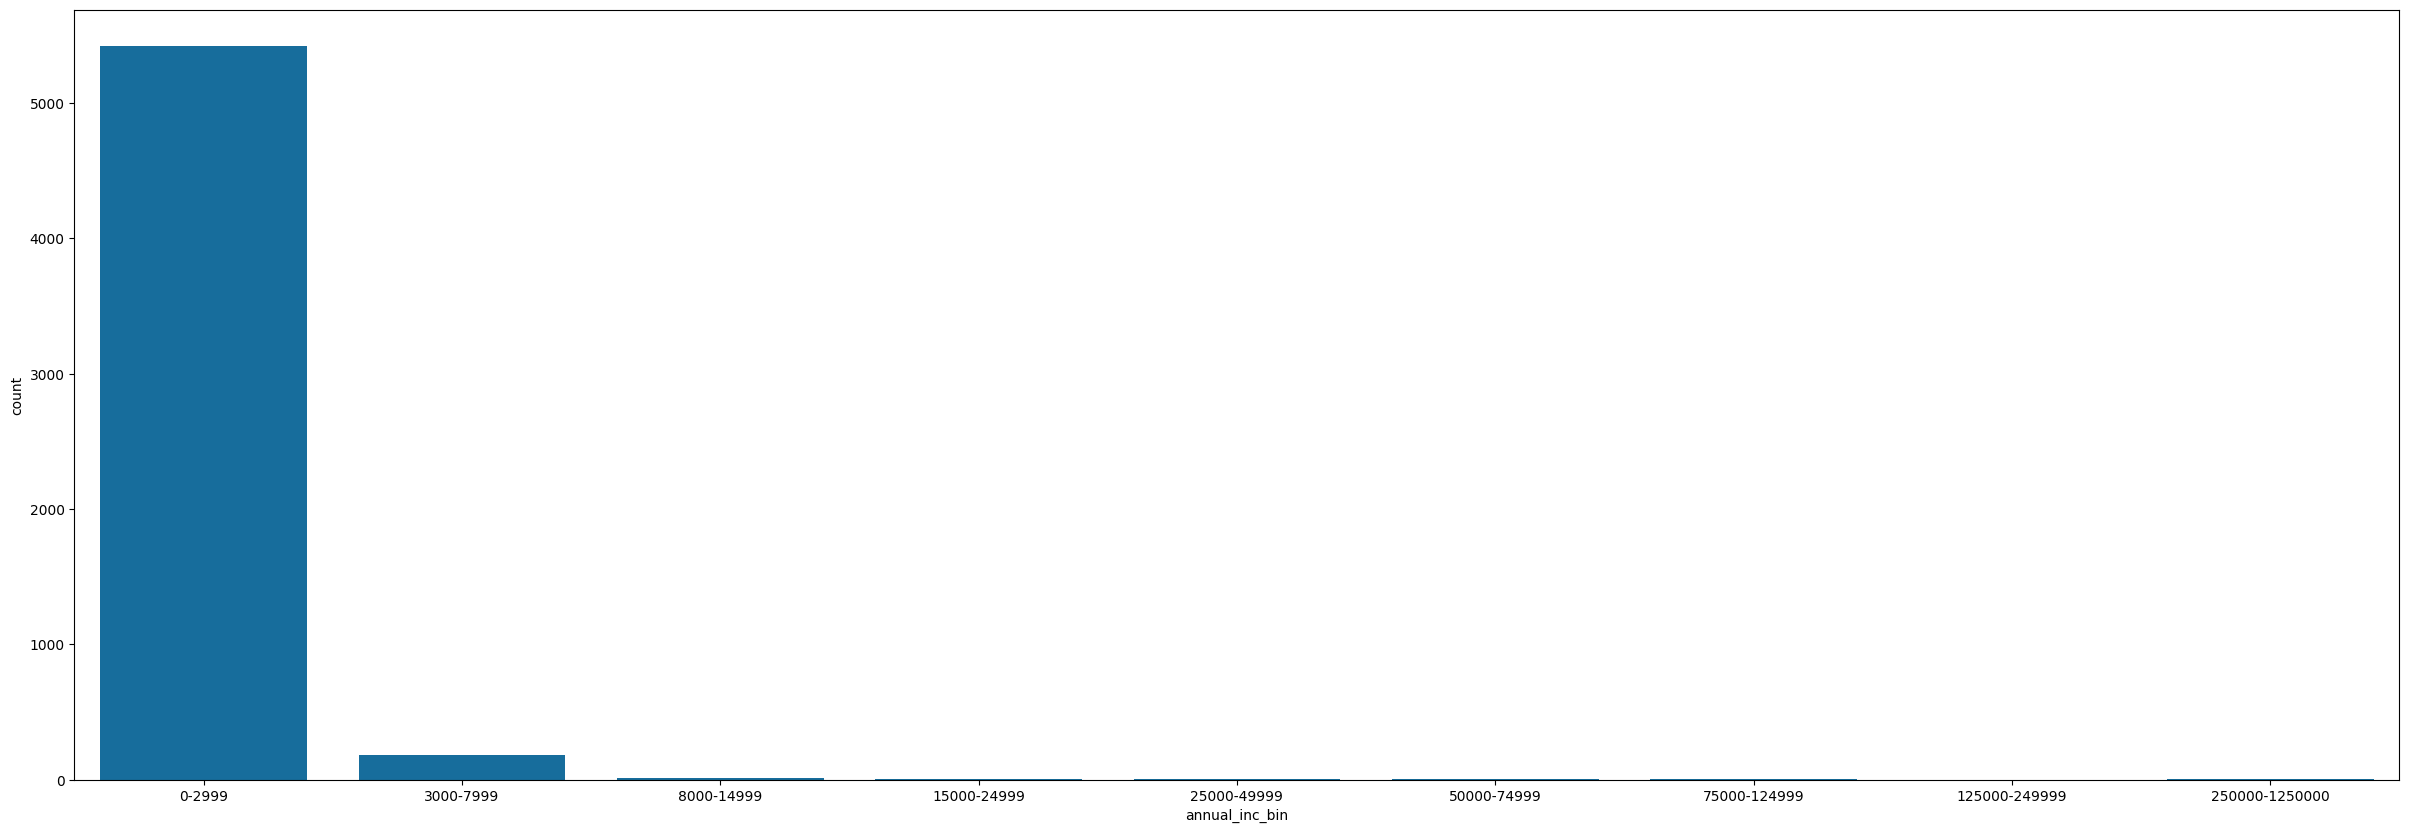

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set_palette('colorblind')

# sns.countplot(x = 'open_acc',data =charged_off_file, order=charged_off_file['open_acc'].value_counts().index)
sns.countplot(x = 'annual_inc_bin',data =charged_off_file)



In [28]:
loan_file['dti_bin'] = pd.cut(loan_file['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','>25'])
loan_file['loan_amnt_bin'] = pd.cut(loan_file['loan_amnt'], bins=5,precision =0,labels=['0-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
loan_file['annual_inc_bin'] = pd.cut(loan_file['annual_inc'], bins=9,precision =0,labels=['0-3k','3k-8k','8k-15k','15k-25k','25k-50k','50k-75k','75k-125k','125k-250k','250k-1250k'])
loan_file['total_acc_bin'] = pd.cut(loan_file['total_acc'], bins=8,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])


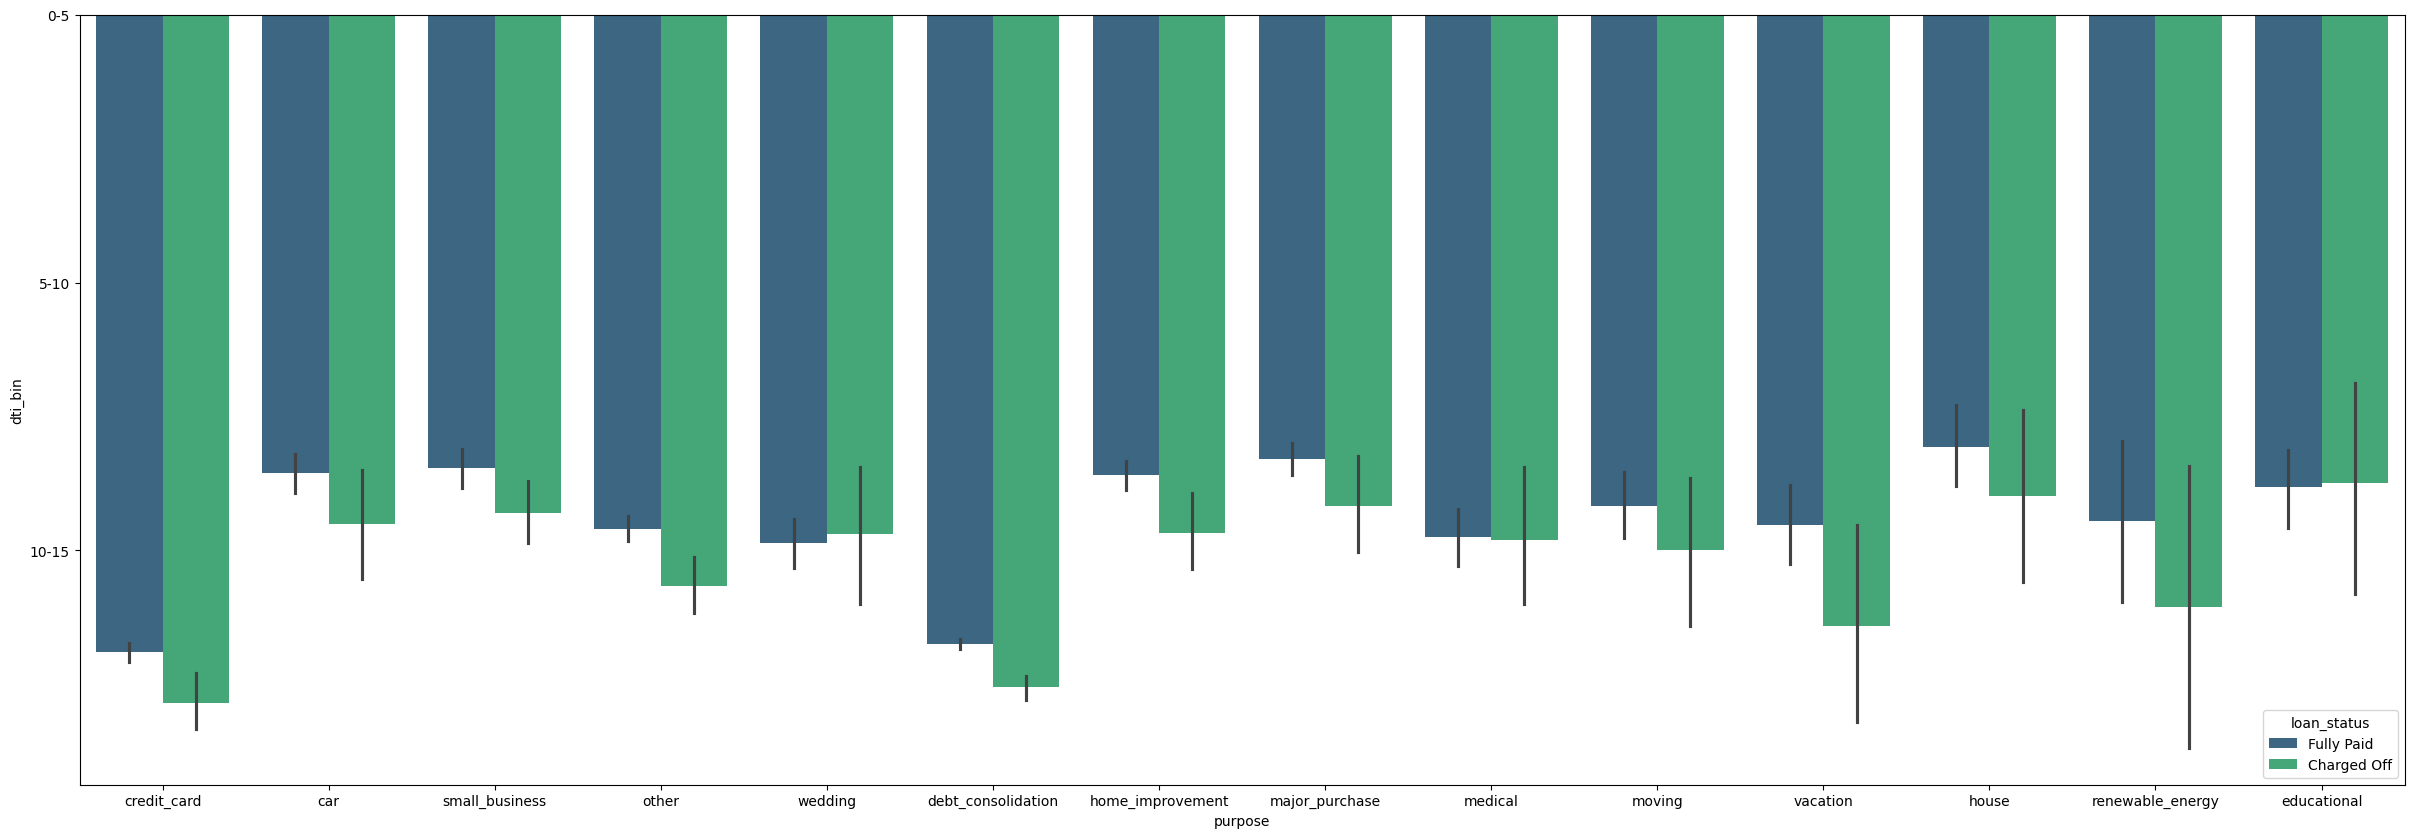

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='dti_bin', hue ='loan_status',palette="viridis")
plt.show()

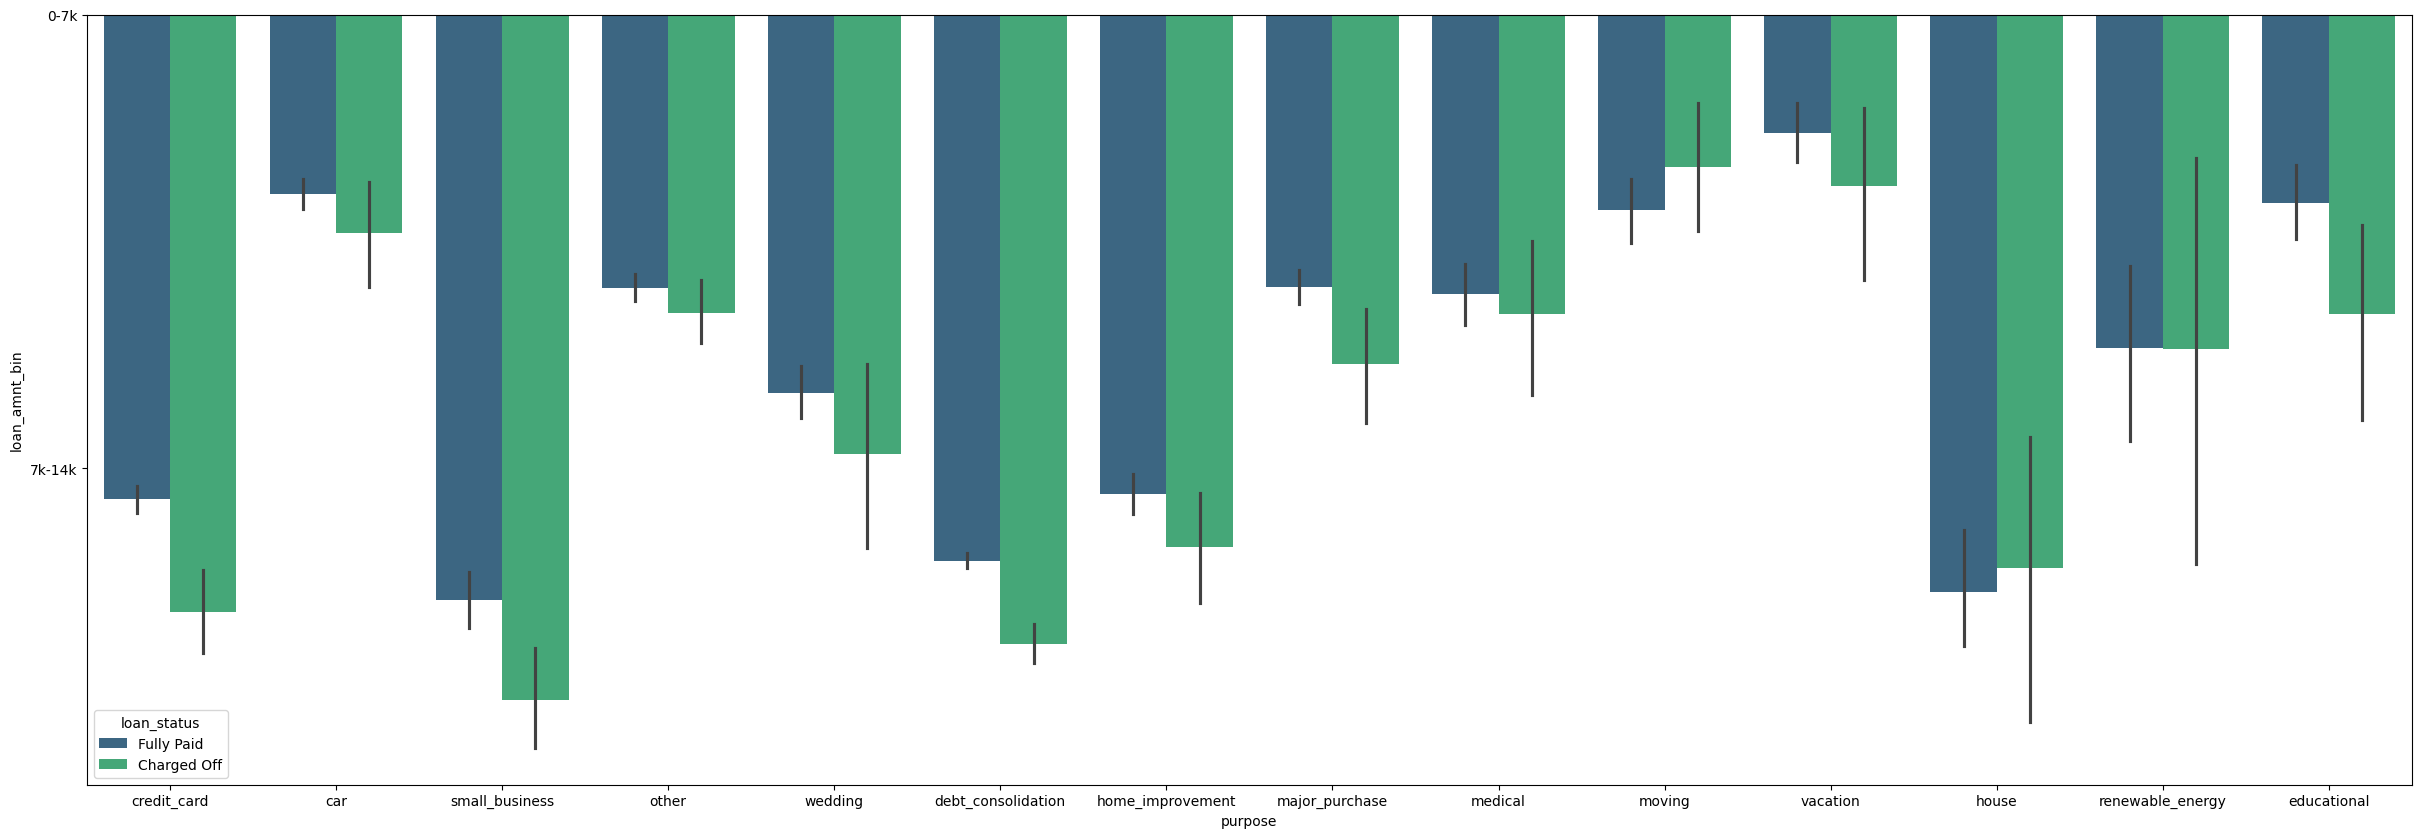

In [30]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='loan_amnt_bin', hue ='loan_status',palette="viridis")
plt.show()

Home improvement and 

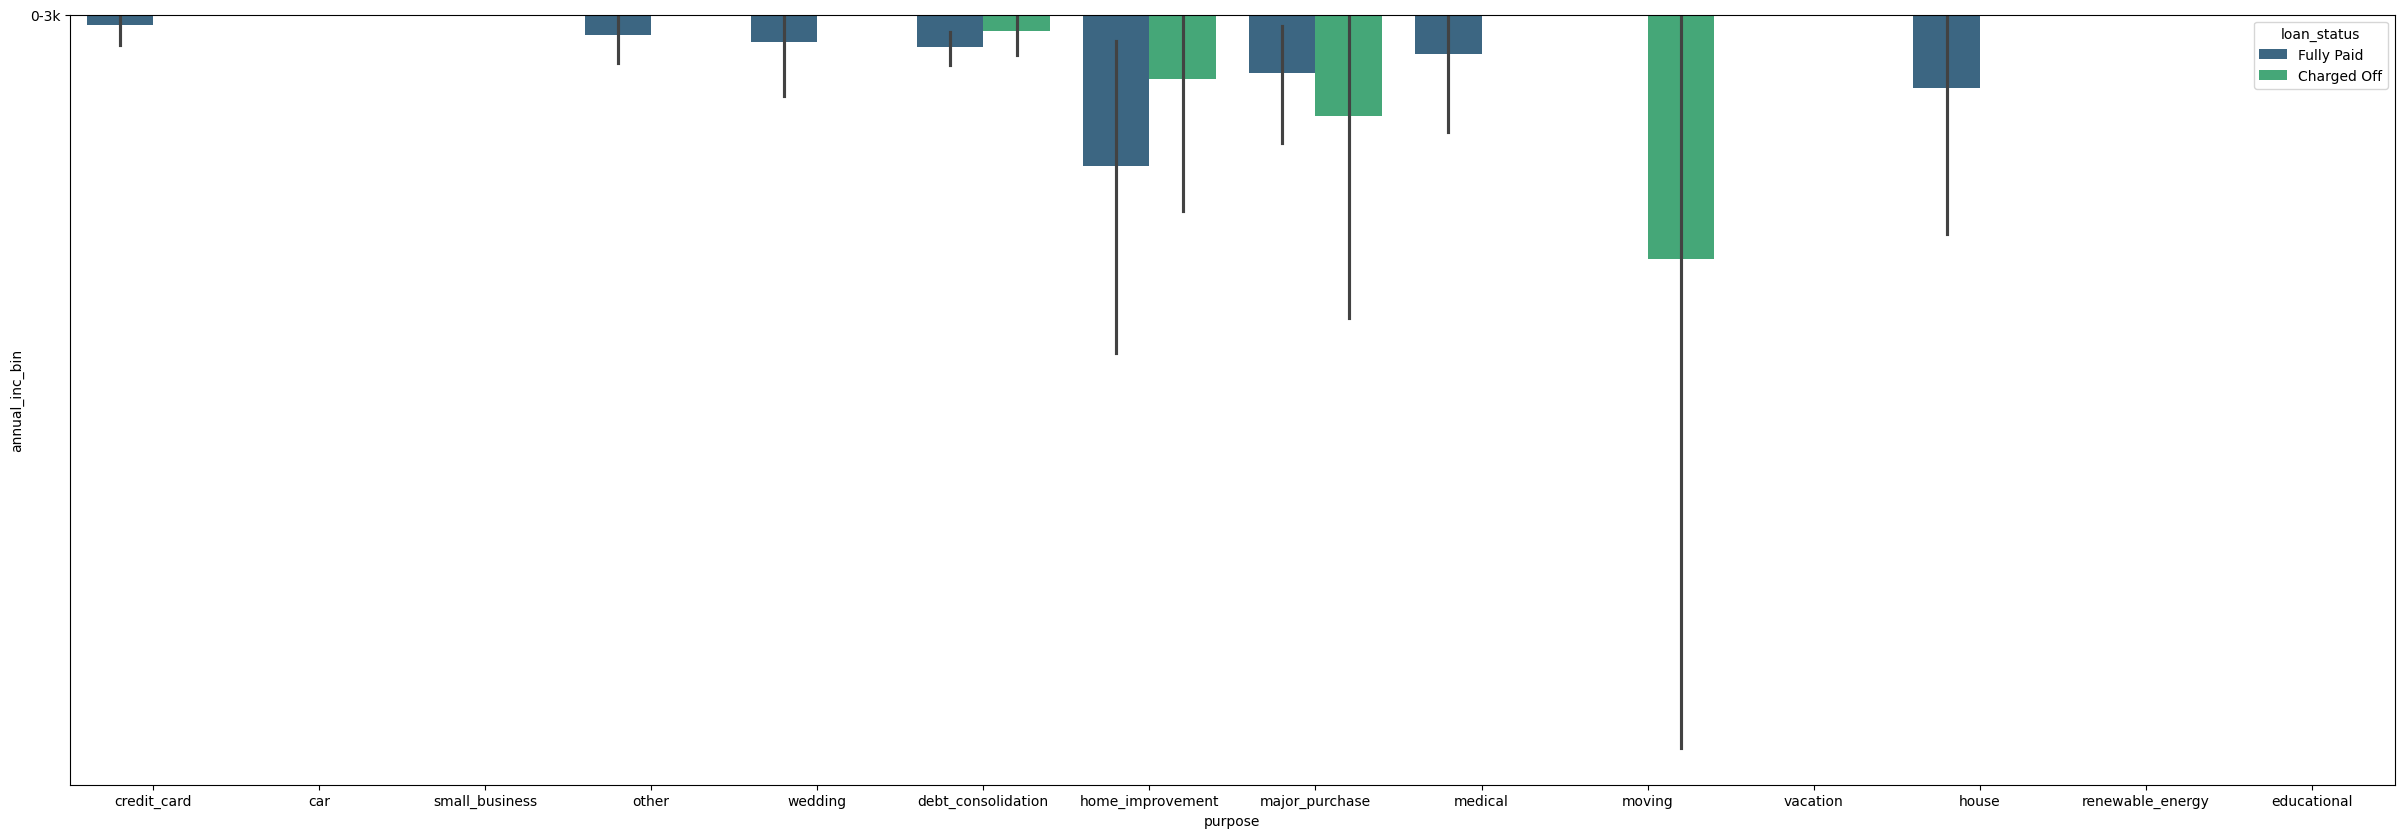

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(data =loan_file,x='purpose', y='annual_inc_bin', hue ='loan_status',palette="viridis")
plt.show()

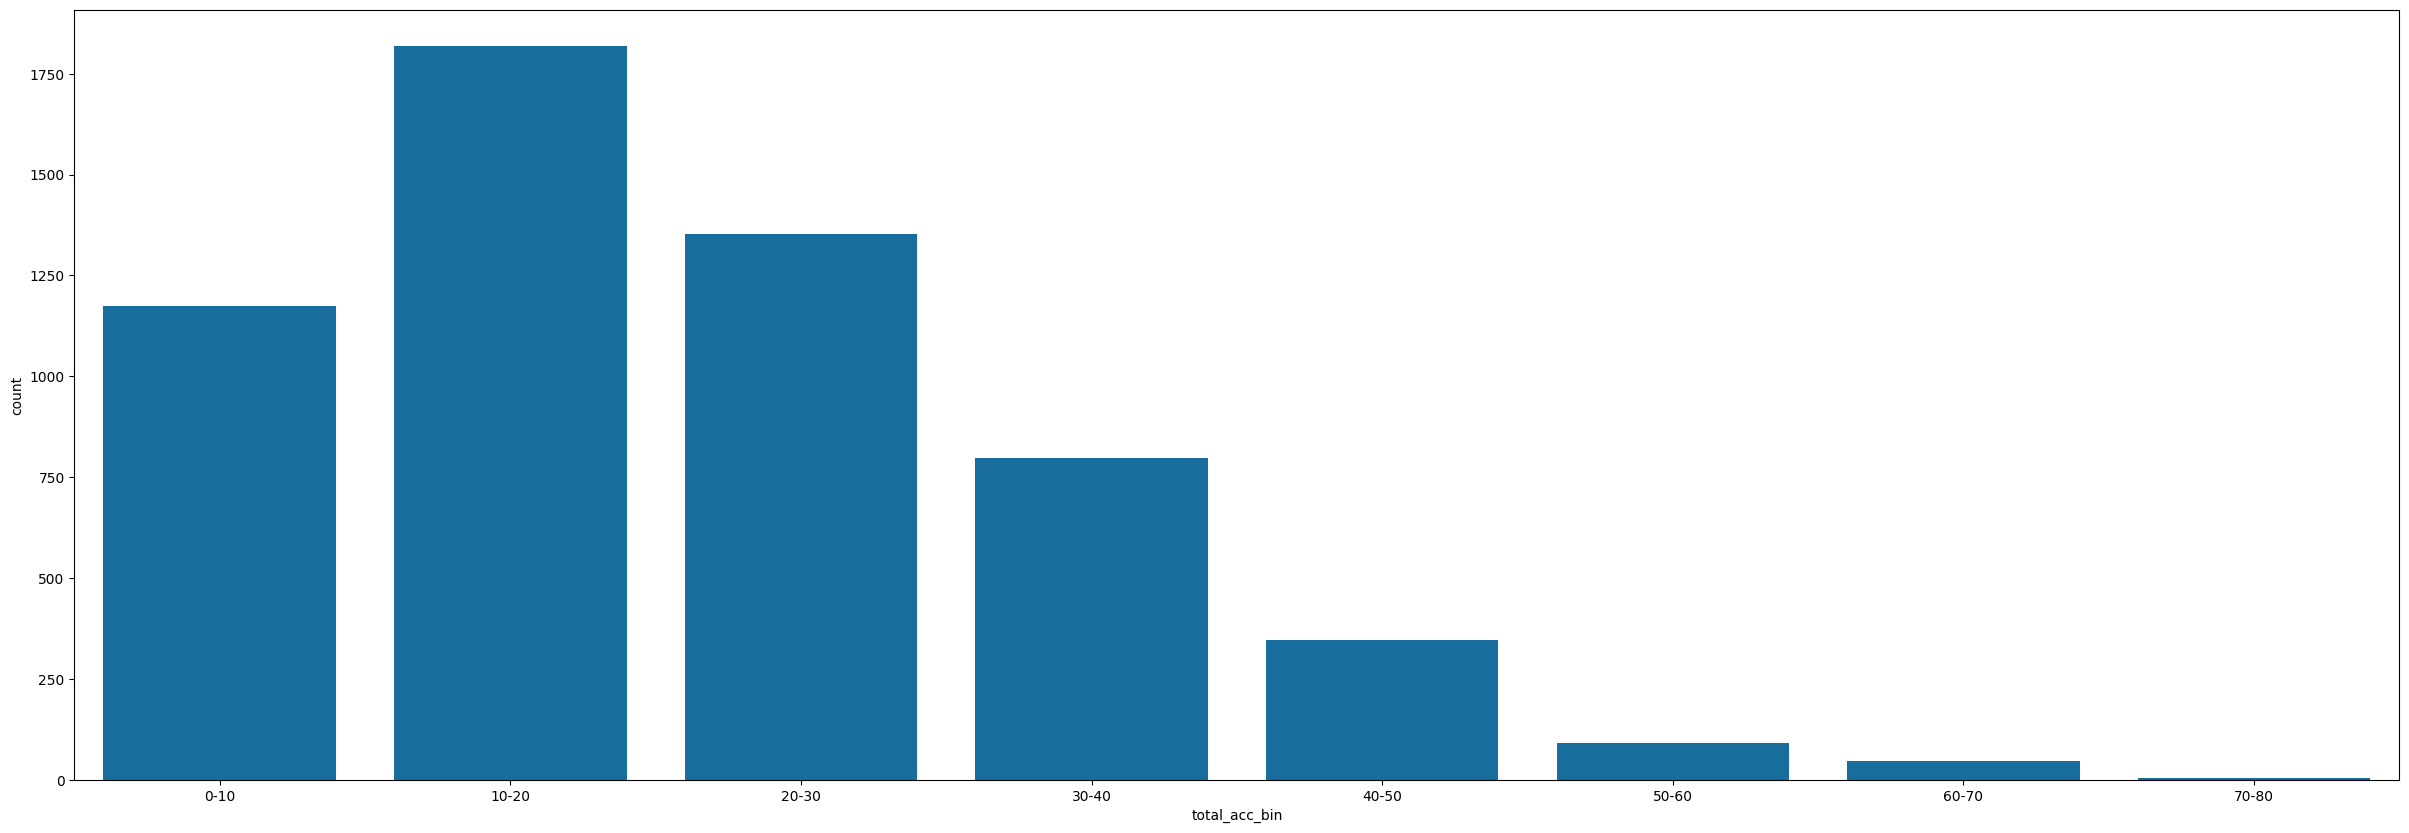

In [32]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'total_acc_bin',data =charged_off_file)
plt.show()